In [45]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import setigen as stg
from astropy import units as u
import blimpy as bl
from astropy.time import Time
import extract_signals as es

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
ts_info = np.load('ts_info.npy', allow_pickle=True).item()
ts = es.get_full_ts(ts_info)
ts.shape

(926,)

In [55]:
from context import *
import blscint as bls

meta_row = META.loc[0]
filename = DRIFTS['filename'].loc[0]
frame_params = bls.get_frame_params(f'{DATA_PREFIX}/{filename}'.replace('blcxx', 
                                                                        meta_row['node']))
df = frame_params['df']
dt = frame_params['dt']
df, dt

blimpy.io.base_reader INFO     Skipping loading data ...


(3.814697265625, 16.777216)

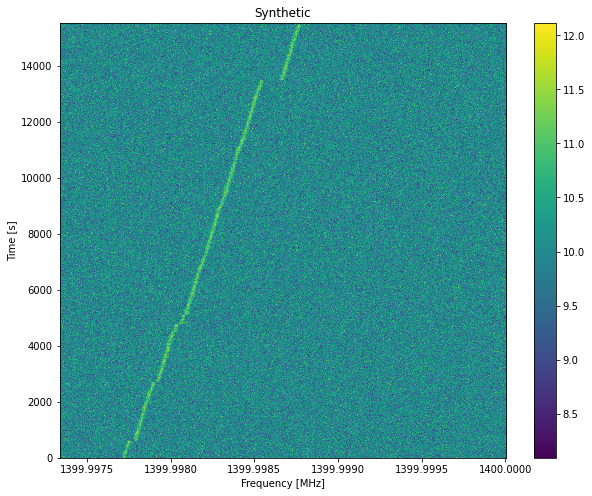

In [67]:
frame = stg.Frame(fchans=700,
                  tchans=len(ts),
                  df=df,
                  dt=dt,
                  fch1=1400*u.MHz,
                  ascending=False)
frame.ts = ts

noise = frame.add_noise(x_mean=10, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=100),
                                            drift_rate=0.05*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=100)),
                          stg.sinc2_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 8))
frame.bl_plot()

In [68]:
DRIFTS

,panel_id,filename,blc1,dr_-0.03_freq_933.342681,dr_-0.04_freq_1200.011914,dr_-0.04_freq_1312.585393,dr_-0.04_freq_1333.346684,dr_-0.04_freq_1350.008112,dr_-0.04_freq_1365.298917,dr_-0.04_freq_1398.598805,...,dr_0.03_freq_960.005774,dr_0.03_freq_1065.599158,dr_0.03_freq_1098.899045,dr_0.03_freq_1198.799039,dr_0.03_freq_1320.107263,dr_0.04_freq_1062.001512,dr_0.04_freq_1298.698922,dr_0.04_freq_1466.681405,dr_0.05_freq_1250.013833,dr_0.06_freq_1866.685360
0,0,blcxx_1421-490_S_2019-04-29T12:39:50.000.fil,NaN,NaN,NaN,-0.050000,NaN,0.042705,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,blcxx_1421-490_R_2019-04-29T12:46:00.000.fil,NaN,NaN,-0.050000,-0.041303,NaN,0.020681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053547,-0.034930
2,2,blcxx_ProxCen_S_2019-04-29T13:02:35.000.fil,0.031202,-0.023627,-0.031904,-0.033587,-0.036673,0.029800,0.034569,0.033166,...,0.023066,0.027695,0.026152,0.029940,0.030220,0.031202,0.033447,-0.038978,0.046393,-0.050080
3,3,blcxx_1421-490_S_2019-04-29T13:34:59.000.fil,NaN,-0.030220,-0.022645,-0.013246,-0.037796,0.037936,0.037936,NaN,...,0.016333,0.020681,0.034990,0.032605,NaN,-0.018878,0.037936,NaN,0.052565,-0.037876
4,4,blcxx_ProxCen_S_2019-04-29T13:47:46.000.fil,0.030361,-0.024048,-0.028818,-0.027415,-0.031343,0.023627,0.032605,0.034168,...,0.020120,0.025311,0.025731,0.028537,0.030080,0.032044,0.031202,-0.033968,0.036854,-0.041663
5,5,blcxx_1934-638_S_2019-04-29T14:21:18.000.fil,NaN,NaN,-0.042565,-0.032465,-0.048597,0.025311,NaN,NaN,...,NaN,NaN,NaN,NaN,0.048737,NaN,NaN,NaN,0.041343,-0.069860
6,6,blcxx_J1644-4559_S_2019-04-29T14:34:27.000.fil,NaN,NaN,NaN,-0.013246,NaN,0.032605,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.060601
7,7,blcxx_ProxCen_S_2019-04-29T14:43:40.000.fil,0.030641,-0.024188,-0.035130,-0.022926,-0.038357,0.032184,0.040741,NaN,...,0.024329,0.031904,0.032184,0.036954,0.033307,0.033727,NaN,-0.040782,0.052425,-0.050922
8,8,blcxx_1421-490_S_2019-04-29T15:15:10.000.fil,NaN,-0.030220,-0.026713,-0.040040,-0.050000,0.017595,NaN,NaN,...,0.025311,0.045511,NaN,NaN,0.030361,NaN,NaN,-0.045391,NaN,-0.030301
9,9,blcxx_ProxCen_S_2019-04-29T15:21:41.000.fil,0.026994,-0.026433,-0.036253,-0.015210,-0.037515,0.032605,0.036954,NaN,...,0.024609,0.028257,0.030501,NaN,NaN,0.030782,0.035691,-0.041984,0.046954,-0.052745


In [76]:
f'{2:02d}'

'02'